#Calulation of Trend Score for each product.
For current trend prediction uncomment the commented line and comment out the fore_score json files. 

In [ ]:
import pandas as pd
import json
df = pd.read_json(r'./fashion_input.json', orient="records")
score = json.load(open("./final_fore_score.json"))
#score = json.load(open("./all_new_scores.json"))
cate_score = json.load(open("/content/new_fore_cate_score.json"))
#cate_score = json.load(open("/content/new_cate_score.json"))
df.head()

,Title,Title_URL,Image,Price,Category,Brand,Color,Attributes,Description,Site,Trend1,Trend2
0,ASOS DESIGN fallen shoulder scuba jumpsuit in ...,https://www.asos.com/asos-design/asos-design-f...,https://images.asos-media.com/products/asos-de...,45.0,Jumpsuit,ASOS DESIGN,Natural blush,"Jumpsuit by ASOS DESIGN, No need for a dress t...","Thick, scuba-style fabric, Super-smooth and st...",ASOS,37.658059,75.316117
1,ASOS DESIGN tie waist jumpsuit in stone,https://www.asos.com/asos-design/asos-design-t...,https://images.asos-media.com/products/asos-de...,35.0,Jumpsuit,ASOS DESIGN,stone,"Jumpsuit by ASOS DESIGN, Part of our responsib...","Woven fabric, Lightweight, soft Lenzing™ Eco, ...",ASOS,29.601669,88.805006
2,Vero Moda linen playsuit with tie waist in white,https://www.asos.com/vero-moda/vero-moda-linen...,https://images.asos-media.com/products/vero-mo...,28.0,Playsuit,Vero Moda,white,"Playsuit by Vero Moda, All in for the all-in-o...","Linen-rich fabric, Strong and breathable, Body...",ASOS,34.631806,103.895418
3,Noisy May layered jumpsuit in black,https://www.asos.com/noisy-may/noisy-may-layer...,https://images.asos-media.com/products/noisy-m...,38.0,Jumpsuit,Noisy May,black,"Jumpsuit by Noisy May, An easy wardrobe win, W...","Lightweight woven fabric Soft and drapey, Lini...",ASOS,61.604622,246.418489
4,ASOS DESIGN satin playsuit with drape detail i...,https://www.asos.com/asos-design/asos-design-s...,https://images.asos-media.com/products/asos-de...,55.0,Playsuit,ASOS DESIGN,Lilac floral,"Playsuit by ASOS DESIGN, Worth making plans fo...","Glossy, satin-style fabric Silky-smooth and dr...",ASOS,15.775663,78.878314


Searching through the attribute and description string for keywords in 3 differnt pattern (key words, key-words and keywords). If the keyword is found, it is removed from the string and appended to the product list. Finally, the length is appended in the attr_len list and current score in cur_score list.

In [ ]:
import numpy as np
cur_score = list()
attr_len = list()

for i in range(len(df["Category"])):

  prod_score = list()
  stri = df["Attributes"][i].lower().replace("\\xa0"," ")
  
  if type(df["Description"][i]) != type(None):
    stri2 = df["Description"][i].lower().replace("\\xa0"," ")

    for key in score:
      if key.lower() in stri or "-".join(key.lower().split()) in stri or "".join(key.lower().split()) in stri or key.lower() in stri2 or "-".join(key.lower().split()) in stri2 or "".join(key.lower().split()) in stri2:
        for word in [key.lower(),"-".join(key.lower().split()),"".join(key.lower().split())]:
          stri = stri.replace(word,"")
          stri2 = stri2.replace(word,"")
        prod_score.append(score[key])

  else:
    for key in score:
      if key.lower() in stri or "-".join(key.lower().split()) in stri or "".join(key.lower().split()) in stri:
        for word in [key.lower(),"-".join(key.lower().split()),"".join(key.lower().split())]:
          stri = stri.replace(word,"")
        prod_score.append(score[key])
  prod_score.append(cate_score[df["Category"][i]])
  
  attr_len.append(len(prod_score))
  
  cur_score.append(sum(prod_score)/len(prod_score))
print(len(cur_score))

1477


Average nuber of attribute per product

In [ ]:
print(sum(attr_len)/1477)

5.374407582938389


#Graphical Visualization
Before correction

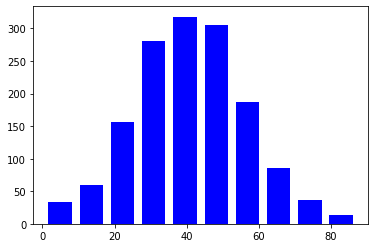

In [ ]:
import numpy as np
import scipy.stats as stats
import pylab as pl

sample_score = cur_score
h = sorted(sample_score)  #sorted

pl.hist(h, color = "blue", rwidth=0.75)      #use this to draw histogram of your data

pl.show()

In [ ]:
df.insert(10,"Current Trend",cur_score)
df.head()

,Title,Title_URL,Image,Price,Category,Brand,Color,Attributes,Description,Site,Trend1,Trend2
0,ASOS DESIGN fallen shoulder scuba jumpsuit in ...,https://www.asos.com/asos-design/asos-design-f...,https://images.asos-media.com/products/asos-de...,45.0,Jumpsuit,ASOS DESIGN,Natural blush,"['Jumpsuit by ASOS DESIGN', 'No need for a dre...","Thick, scuba-style fabric, Super-smooth and st...",ASOS,37.658059,75.316117
1,ASOS DESIGN tie waist jumpsuit in stone,https://www.asos.com/asos-design/asos-design-t...,https://images.asos-media.com/products/asos-de...,35.0,Jumpsuit,ASOS DESIGN,stone,"['Jumpsuit by ASOS DESIGN', 'Part of our respo...","Woven fabric, Lightweight, soft Lenzing™ Eco, ...",ASOS,29.601669,88.805006
2,Vero Moda linen playsuit with tie waist in white,https://www.asos.com/vero-moda/vero-moda-linen...,https://images.asos-media.com/products/vero-mo...,28.0,Playsuit,Vero Moda,white,"['Playsuit by Vero Moda', 'All in for the all-...","Linen-rich fabric, Strong and breathable, Body...",ASOS,34.631806,103.895418
3,Noisy May layered jumpsuit in black,https://www.asos.com/noisy-may/noisy-may-layer...,https://www.asos.com/noisy-may/noisy-may-layer...,38.0,Jumpsuit,Noisy May,Lilac floral,"['Jumpsuit by Noisy May', 'An easy wardrobe wi...","Lightweight woven fabric Soft and drapey, Lini...",ASOS,61.604622,246.418489
4,ASOS DESIGN satin playsuit with drape detail i...,https://www.asos.com/asos-design/asos-design-s...,https://images.asos-media.com/products/asos-de...,55.0,Playsuit,ASOS DESIGN,Lilac floral,"['Playsuit by ASOS DESIGN', 'Worth making plan...","Glossy, satin-style fabric Silky-smooth and dr...",ASOS,15.775663,78.878314


#Correction term
Finding the mean of current score.

In [ ]:
from statistics import mean
avg = mean(cur_score)
print(round(avg,2))

40.86


Applying the correction term the old score

In [ ]:
import math
for i in range(len(attr_len)):
  cur_score[i] = cur_score[i] - (cur_score[i]-avg)/math.exp((attr_len[i] - 1)**2)
print(cur_score)

[25.754814700800875, 53.22380714325711, 25.100633390752584, 60.0328562829195, 15.323757638000005, 26.733749196080744, 41.192369551750005, 65.75675635228754, 53.85923476561913, 59.686288022680614, 30.00533211755, 43.695563025359846, 42.102791408725, 47.6108980318125, 55.43486193301422, 50.225816077553226, 71.56498925867142, 26.827143611780002, 42.741658414557165, 67.01610847543672, 54.655312527375045, 47.2729656257, 69.61326469360644, 53.9773143428875, 23.843298248775, 61.25061499106679, 31.365970743912825, 36.89910623050039, 58.98307557543676, 40.07327333760001, 50.56140734159077, 64.54086342928572, 45.6929814196569, 47.15645001576252, 80.81500670821194, 33.9523487593625, 32.05735173574079, 54.655312527375045, 25.059152828555554, 30.557433542657144, 31.465430028047106, 53.9773143428875, 50.08620623968761, 46.660003127119424, 55.5989125634286, 73.80802354386846, 11.336176380103902, 82.11377348034902, 45.56111921241801, 20.71564508907028, 42.64469956898571, 63.39513546058477, 34.93223826

After Correction

In [ ]:
sample_score = cur_score
h = sorted(sample_score)

pl.hist(h, color = "blue", rwidth=0.75)

pl.show()

Uncomment it if working on forecast score

In [ ]:
# df.insert(11,"Forecast_trend",cur_score)
# df.head()

,Title,Title_URL,Image,Price,Category,Brand,Color,Attributes,Description,Site,Current_trend,Forecast_trend
0,ASOS DESIGN fallen shoulder scuba jumpsuit in ...,https://www.asos.com/asos-design/asos-design-f...,https://images.asos-media.com/products/asos-de...,45.0,Jumpsuit,ASOS DESIGN,Natural blush,"Jumpsuit by ASOS DESIGN, No need for a dress t...","Thick, scuba-style fabric, Super-smooth and st...",ASOS,24.927721,25.754815
1,ASOS DESIGN tie waist jumpsuit in stone,https://www.asos.com/asos-design/asos-design-t...,https://images.asos-media.com/products/asos-de...,35.0,Jumpsuit,ASOS DESIGN,stone,"Jumpsuit by ASOS DESIGN, Part of our responsib...","Woven fabric, Lightweight, soft Lenzing™ Eco, ...",ASOS,29.707357,53.223807
2,Vero Moda linen playsuit with tie waist in white,https://www.asos.com/vero-moda/vero-moda-linen...,https://images.asos-media.com/products/vero-mo...,28.0,Playsuit,Vero Moda,white,"Playsuit by Vero Moda, All in for the all-in-o...","Linen-rich fabric, Strong and breathable, Body...",ASOS,31.543639,25.100633
3,Noisy May layered jumpsuit in black,https://www.asos.com/noisy-may/noisy-may-layer...,https://images.asos-media.com/products/noisy-m...,38.0,Jumpsuit,Noisy May,black,"Jumpsuit by Noisy May, An easy wardrobe win, W...","Lightweight woven fabric Soft and drapey, Lini...",ASOS,45.347356,60.032856
4,ASOS DESIGN satin playsuit with drape detail i...,https://www.asos.com/asos-design/asos-design-s...,https://images.asos-media.com/products/asos-de...,55.0,Playsuit,ASOS DESIGN,Lilac floral,"Playsuit by ASOS DESIGN, Worth making plans fo...","Glossy, satin-style fabric Silky-smooth and dr...",ASOS,12.579442,15.323758


Saving it in excel and json format. The Json format is used by elastic search for website.

In [ ]:
df.to_json("complete_score_square_corr.json",orient='records')
df.to_excel("complete_score_square_corr.xlsx", index=False)